In [14]:
credit_data_sample<- read.csv("M:\\Imarticus\\ProjectR\\Credit card fraud\\Datafiles\\credit_data_sample.csv", header = TRUE,
                              stringsAsFactors = TRUE,
                              strip.white = FALSE ,
                              sep = ',')
credit_data_sample$Class= as.factor(credit_data_sample$Class)


In [3]:
library(dplyr)
var1<-select(credit_data_sample,c(1:30))
var2<-credit_data_sample$Class
library(e1071)
svm_model<-svm(Class~V4+V14+V17,data=credit_data_sample)

In [4]:
pred <- predict(svm_model,var1)
table(pred,var2)
nrow(var1)

    var2
pred    0    1
   0 1501   69
   1    5  423

[1] 1998

In [5]:

library(caTools)

split = sample.split(credit_data_sample$Class, SplitRatio = .8)
training_data = subset(credit_data_sample, split == TRUE)
test_data = subset(credit_data_sample, split == FALSE)
nrow(training_data)
nrow(test_data)

[1] 1599

[1] 399

In [8]:
svm_mod = svm(Class~V4+V17+V14, data = training_data,
                  type = 'C-classification', kernel = 'radial')

In [9]:
test_pred = predict(svm_mod, test_data[,-31])
table(test_pred,test_data$Class)

         
test_pred   0   1
        0 299  18
        1   2  80

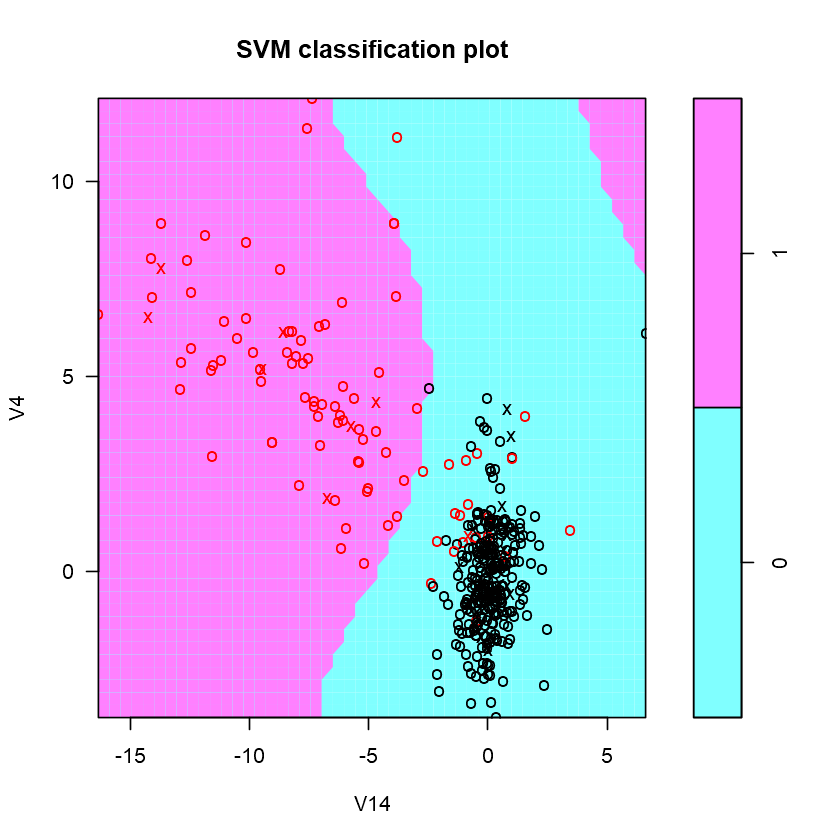

In [10]:
plot(svm_mod,test_data,V4~V14)

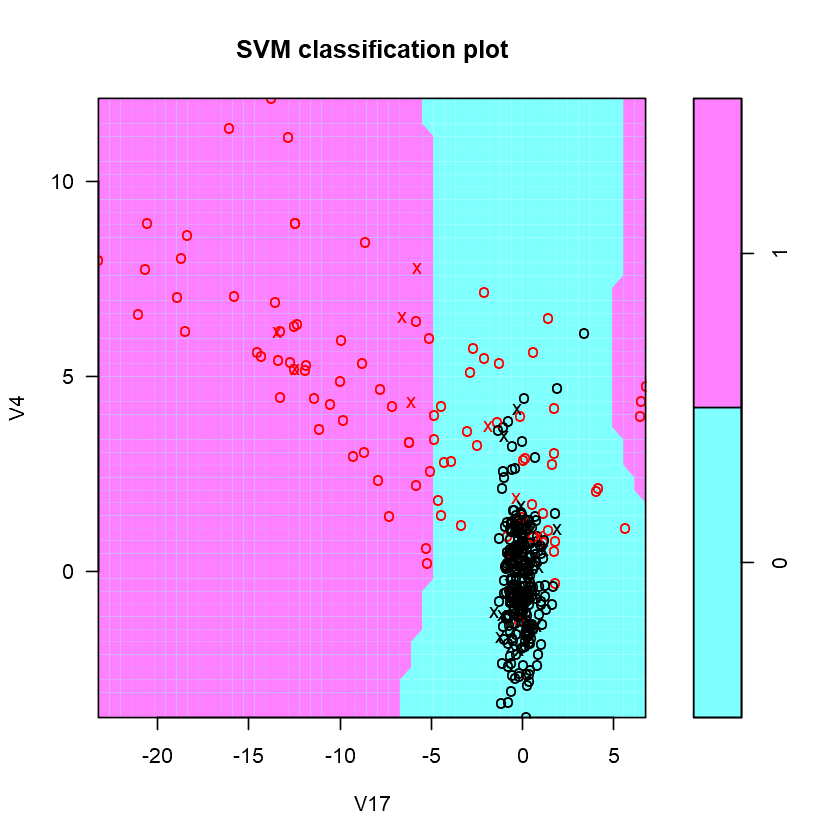

In [11]:
plot(svm_mod,test_data,V4~V17)

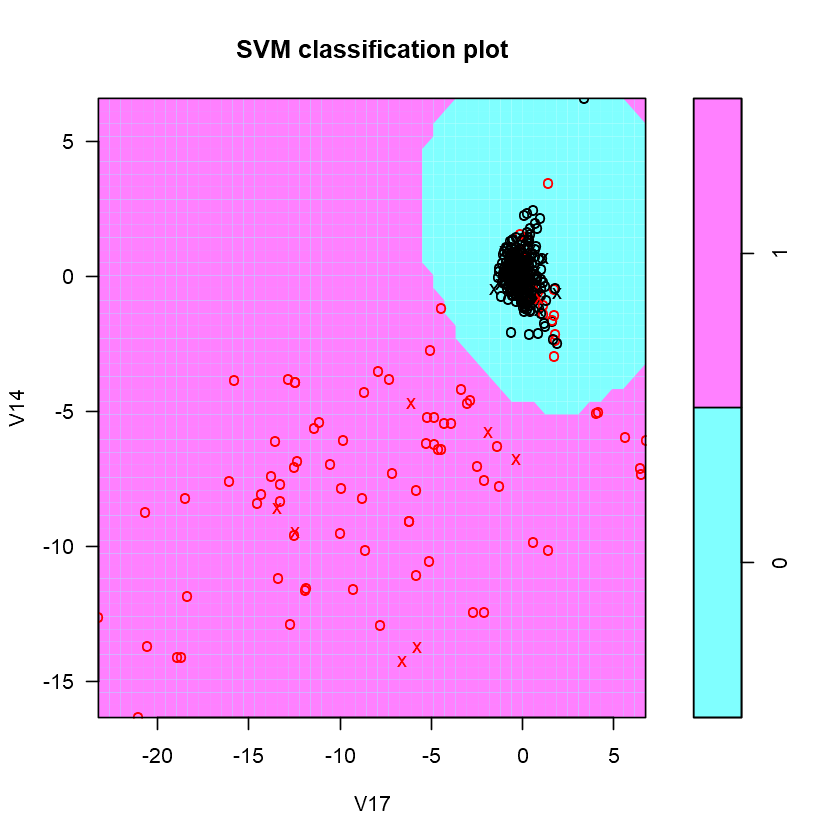

In [12]:
plot(svm_mod,test_data,V14~V17)

In [ ]:
#conclusions on given data as per SVM classification plots. 
# 1. If V14<=-8 and V4 is between -4 to 12 definitely chance their is a chance of fraud i.e Class=1.
# 2. If V17<=-8 and V4 is between -4 to 12 definitely chance their is a chance of fraud i.e Class=1.
# 3. If V17<=-8 and V14<=-6 definitely chance their is a chance of fraud i.e Class=1.